# Linear regression

The equation of the linear regression model is as follows:

$\hat{y} = \theta_{0} + \theta_{1} * x_{1} + \theta_{2} * x_{2} + ... + \theta_{n} * x_{n}$

* Where $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_{i}$ is the $i^{th}$ feature value.
* $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$).

This whole equation can be written in a concise form as follows:

$\hat{y} = h_{\theta}(x) = \theta . x$

Where $\theta$ is the model's parameters, and x is the inputs.

We need to calculate a performance measure that will be used to train the model. This performance measure will be RMSE (Root Mean Square Error). However, we will use the MSE (Mean Square Error) during training because it is easier to compute and it will still minimize the RMSE since RMSE is the square root of MSE.

$MSE(X, h_{\theta}) = \frac{1}{m} * \sum_{i = 1}^{m}(\theta^{T} * x^{(i)} - y^{(i)})^2$

There is an equation that finds the value $\theta$ that minimizes the cost function directly. This equation is called the _Normal Equation_, and it is:

$\hat{\theta} = (X^T * X)^{-1} * X^T * y$

Where:
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is the vector of target values.

The following code generates a random linear dataset:

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

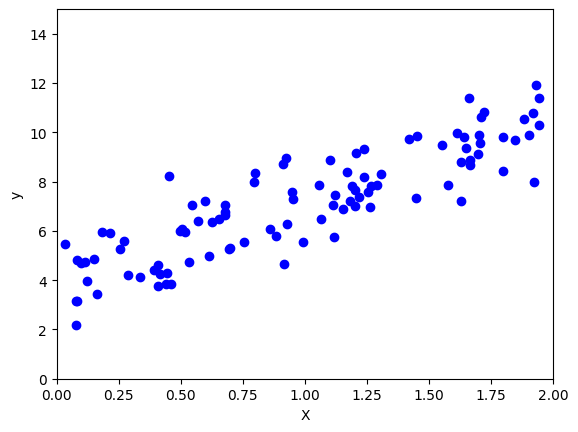

In [3]:
from matplotlib import pyplot as plt
plt.plot(X, y, 'bo')
plt.xlim((0, 2))
plt.ylim((0, 15))
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let us now compute the ideal parameters using the normal equation discussed earlier:

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance so that there is something to be multiplied by the bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.86059083],
       [3.32238981]])

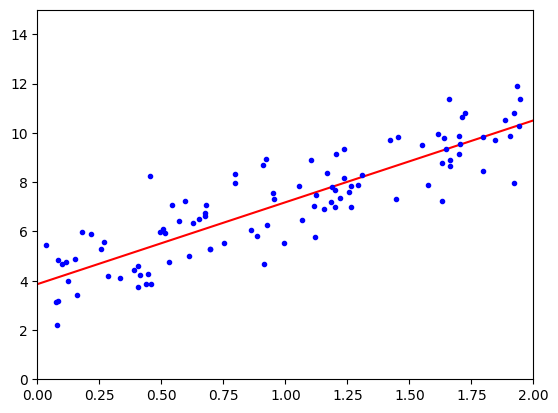

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()



Now let us see the performance of the sklearn model

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept = bias, coef = other parameters

(array([3.86059083]), array([[3.32238981]]))

In [8]:
y_scikit_learn = lin_reg.predict(X_new)

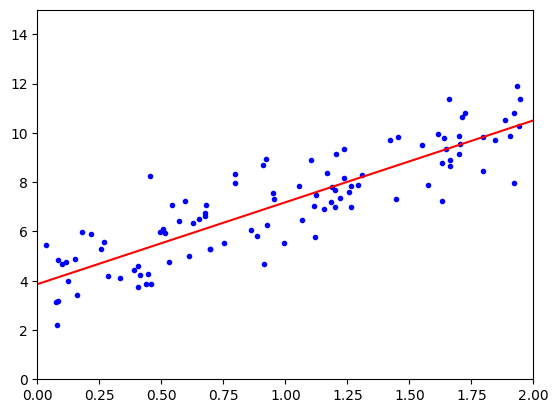

In [9]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_scikit_learn, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

The difference between the two implementations is that scikit-learn doesn't use the direct inverse of X since it might not exist. Instead, it uses the pseudoinverse, which is always defined, and it also handles edge cases quite nicely. 

## Gradient Descent

Linear regression can be trained using the gradient descent algorithm.
This allows for a larger number of features, and a larger number of samples for better accuracy. 

The equaion for the gradient descent is equal to the derivative of the cost function with regard to each feature in the input vector.

$\frac{\partial}{\partial{\theta_j}} MSE(\theta) = \frac{2}{m} \sum_{i = 1}^{m}(\theta^T*x^{(i)} - y^{(i)})*x_j^{(i)}$

Instead of using the above equation for every input feature, we can calculate the entire derivative in one go using the following equation:

$\nabla_{\theta} MSE(\theta) = \begin{pmatrix} 
\frac{\partial}{\partial{\theta_{0}}} MSE(\theta) \\
\frac{\partial}{\partial{\theta_{1}}} MSE(\theta) \\
\frac{\partial}{\partial{\theta_{2}}} MSE(\theta) \\
. \\
. \\
. \\
\frac{\partial}{\partial{\theta_n}} MSE(\theta)
\end{pmatrix} = \frac{2}{m}X^T(X\theta-y)$

This new equation needs to use the entire training set to calculate the gradient for a single training step. Therefore, it is called "Batch Gradient Descent", and it is terribly slow on large dataset. We will use minibatch gradient descent as a better alternative later. 

The final equation involves putting a minus sign on the gradient, scaling it using the learning rate, and adding it to the old parameters to update them. The following equation demonstrates that:

$\theta^{(next \ step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$

$\eta$ = learning rate

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) #random parameters initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    


In [11]:
theta #exactly as the normal equation!

array([[3.86059083],
       [3.32238981]])

What would happen if the learning rate is too low or too high?
Well, the next figure shows that:

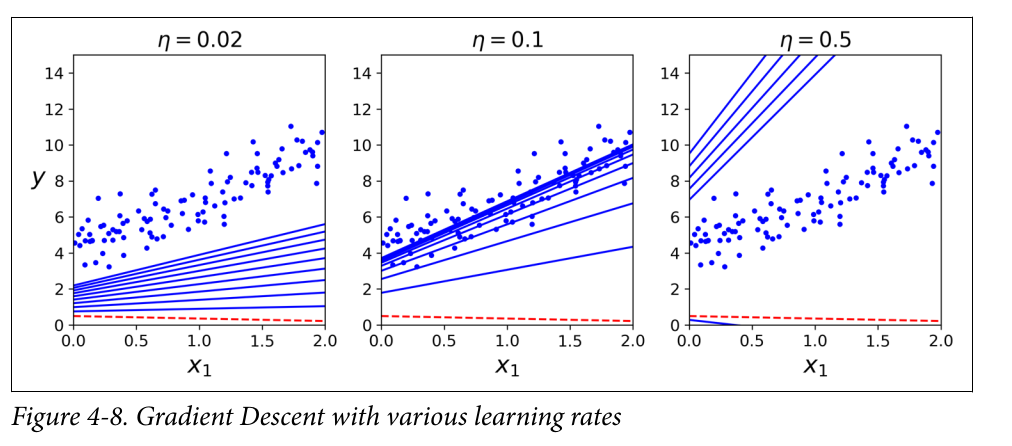

* On the left, the learning rate is too low, and it would take a long time for the model to converge.
* In the middle, the learning rate is just right.
* on the right, the learning rate is too large, which makes the model diverge. 

## Stochastic Gradient Descent
Instead of using the entire training data to calculate the gradient, we can choose a single training sample at random and use that to calculate a single step.

Benefits and drawbacks of this approach:

Benefits:
1. It is faster to calculate a single step since we need to use only a single sample from the data.
2. It helps to escape from local minima. 

drawback:
Because of the random nature of this algorithm, it is not possible to reach the global minimum since the algorithm will start bouncing around it when it reaches it. 

A solution to the drawback of this algorithm would be to gradually reduce the learning rate as the training progresses. This can be done using a _learning schedule_. 

__Note:__ The following code isn't guaranteed to pick all the samples since we are choosing at random. You can instead shuffle the entire dataset and labels jointly, and pick them one by one. Make sure to reshuffle at the start of each epoch.

In [12]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients


In [13]:
theta

array([[3.86454591],
       [3.36206648]])

To perform SGD linear regression in scikit-learn, we can use the SGDRegressor class as follows:

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.88189782]), array([3.38016236]))

## Minibatch Gradient Descent
Instead of using all the samples of the data set or a single sample, we would choose a small subset of the dataset to calculate each training step. This way, we get the benefits of both approaches. 

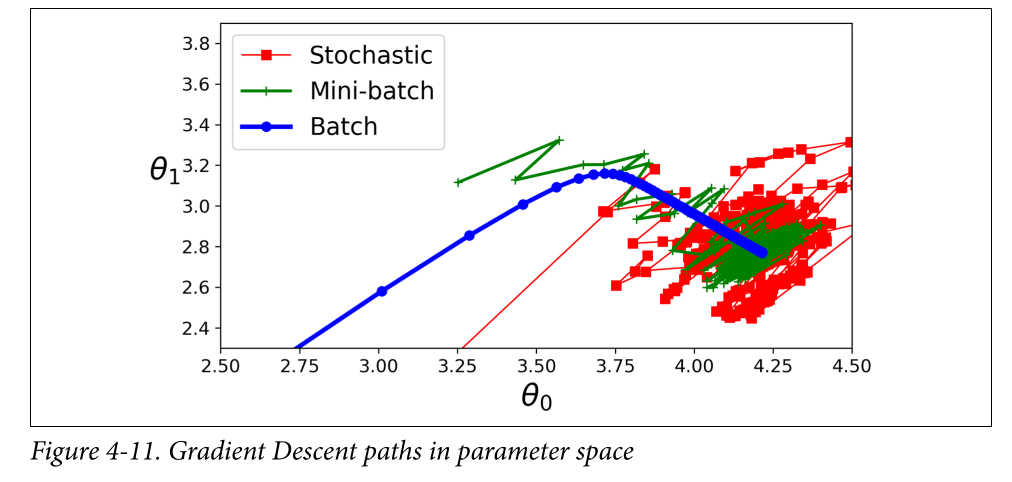

## Polynomial Regression

What if the data is more complex than a straight line?
We can still fit a linear model to non-linear data by adding powers of each features as new features, then train a linear model to this extended set of features. This approach is called _polynomial regression_.

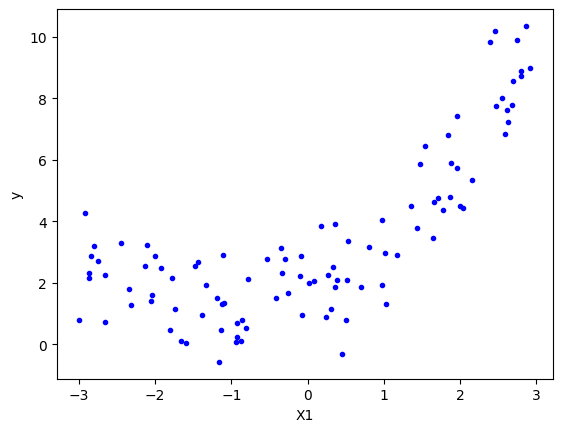

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 # set the x-axis from -3 to 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X) # add the square of X as a new feature
X[0], X_poly[0]

(array([2.92250933]), array([2.92250933, 8.54106081]))

In [18]:
lin_reg_quadratic = LinearRegression()
lin_reg_quadratic.fit(X_poly, y)
lin_reg_quadratic.intercept_, lin_reg_quadratic.coef_

(array([1.75432865]), array([[1.09797853, 0.510827  ]]))

In [19]:
y_pred = lin_reg_quadratic.predict(X_poly)

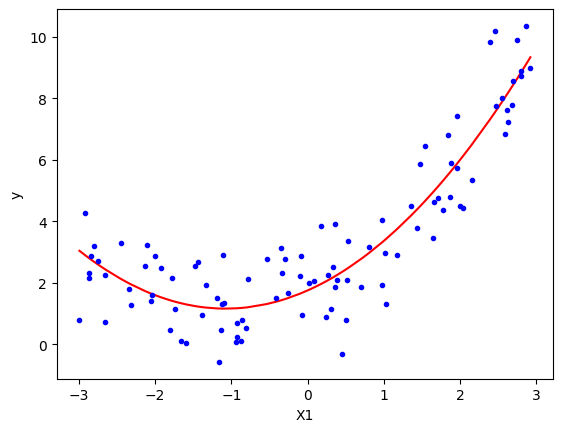

In [20]:
sorted_index = X.ravel().argsort()
plt.plot(X.ravel()[sorted_index], y_pred.ravel()[sorted_index], 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

The model predicts the following function for the input features:

$\hat{y} = 0.506*x_{1}^2 + 1.006x_{1} + 2.108$

Whereas the original function was:

$y = 0.5x_{1}^2 +1.0x_{1} + 2.0 + Gaussian\ noise$

Polynomial features also can find relationships between the input features because they don't only add the powers of the features, but also all combinations between other features. For example, if there were 2 features named a, b, PolynomialFeatures with degree 3 will not only add $a^2,\ a^3,$ and $b^3$, but also the combinations $ab,\ a^2b,$ and $ab^2$

__Note:__ PoylinomialFeatures($degree = d$) transforms an array that contains $n$ features into an array containint $\frac{(n + d)!}{d!n!}$ features. This might cause a feature explosion, so be aware of that.

If you use high degree polynomial features, you will likely fit the data better. Check the following example:

In [21]:
features_30 = PolynomialFeatures(degree = 30, include_bias = False)
X_300 = features_30.fit_transform(X)
lin_reg_30 = LinearRegression()
lin_reg_30.fit(X_300, y)


LinearRegression()

In [22]:
y_pred_30 = lin_reg_30.predict(X_300)

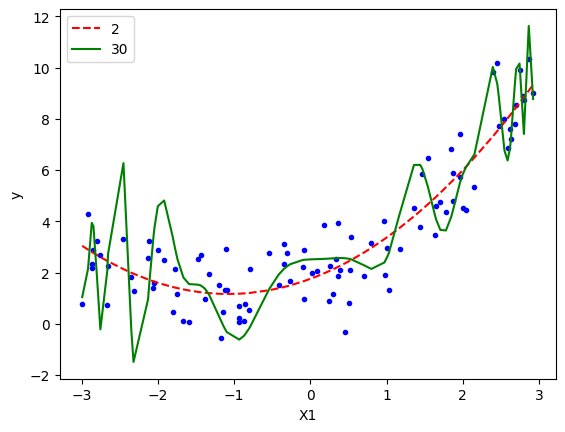

In [23]:

plt.plot(X, y, 'b.')
plt.plot(X.ravel()[sorted_index], y_pred.ravel()[sorted_index], 'r--', label = '2')
plt.plot(X.ravel()[sorted_index], y_pred_30.ravel()[sorted_index], 'g-', label = '30')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()

This high degree model is overfitting the training data, which doesn't necessarily mean that it will perform well on testing data. 

How can you determine if the model overfits or underfits?
1. Using cross validation, you can check if the model performs well on the training data, but performs poorly on the testing data. This indicates that the model is overfitting, which means that it needs to be regularized, or the model's complexity needs to be reduced.
2. Another way to tell is by using learning curves. These are plots of the model's performance on the training set and validation set as a function of the training iteration or training size. 

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#plot the learning curve as a function of the training set size
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.legend(loc = 'best')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim((0, 3))
    plt.show()

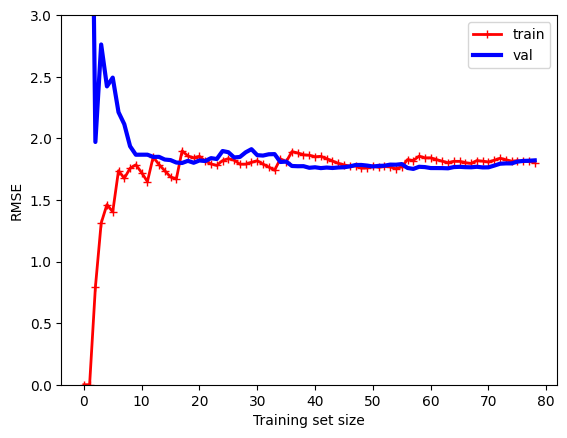

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

We notice that the model starts to plateau at a relatively high value. This means that the model is underfitting, and we need to use a more complex model since adding more data to the training set doesn't seem to make things better.

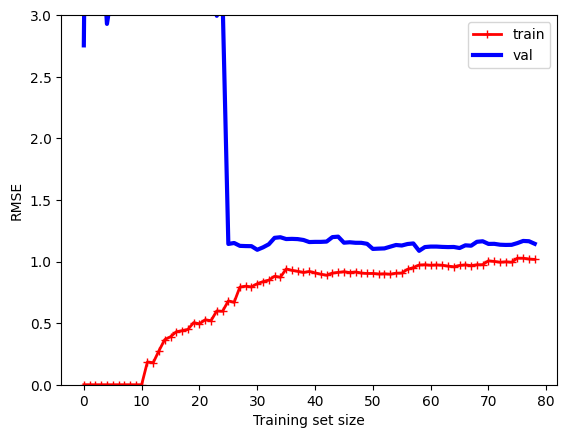

In [26]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)

This time the curves are slightly different.
1. The training error seems to be lower than when we used a simple linear model. 
2. There is a noticeable gap between the val and testing error, which is an obvious indicator that the model is overfitting. This gap will eventually get smaller as the training set size increases.

__Note__: We can improve the model's generalization performance by feeding it more data. The previous model is an example of such situation.

## Ridge Regression
This is a version of the linear regrission that limits the weights by adding a new term to the cost function that keeps the weights as small as possible. Here is the cost function used in this model:

$J(\theta) = MSE(\theta) + \frac{\alpha}{2} * \sum_{i = 1}^{n}(\theta_i^2)$

__Notes:__ 
1. The hyperparamter $\alpha$ controls how much you want to regularize the model.
2. The bias term ($\theta_{0}$) is not regularized since the sum starts at 1, not 0.
3. It is important to scale the data (e.g. using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features.

Ridge regression can be implemented either by using a closed-form solution, or by using gradient descent. The pros and cons of each approach are the same as mentioned earlier.

Closed-form equation:

$\hat{\theta} = (X^TX + \alpha*A)^{-1}X^Ty$

__Note:__ $A$ is an identity matrix of shape $(n+1)*(n+1)$, except for the top left cell set to zero to account for the bias term.


In [67]:
X = 3 * np.random.rand(100, 1)
y = 3*X**2 - 4*X + 4 + 3*np.random.randn(100, 1)

In [93]:
from sklearn.linear_model import Ridge
features_poly = PolynomialFeatures(degree = 22, include_bias = False)
X_poly = features_poly.fit_transform(X)

ridge_reg_0 = Ridge(alpha = 0, solver = 'cholesky')
ridge_reg_0.fit(X_poly, y)
y_pred_0 = ridge_reg_0.predict(X_poly)

ridge_reg_small = Ridge(alpha = 0.01, solver = 'cholesky')
ridge_reg_small.fit(X_poly, y)
y_pred_small = ridge_reg_small.predict(X_poly)

ridge_reg_1= Ridge(alpha = 1, solver = 'cholesky')
ridge_reg_1.fit(X_poly, y)
y_pred_1 = ridge_reg_1.predict(X_poly)



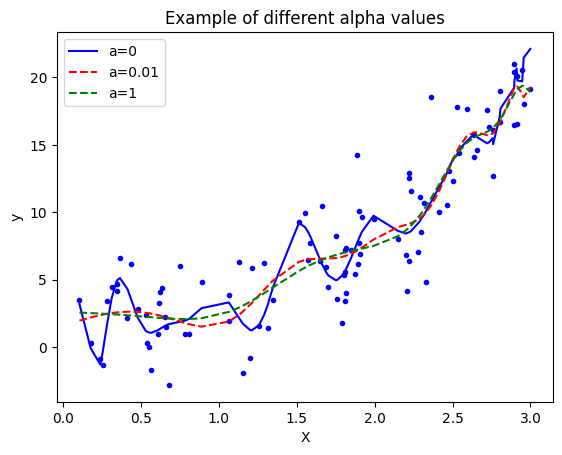

In [94]:
sorted_index = X.ravel().argsort()
plt.plot(X, y, 'b.')
plt.plot(X.ravel()[sorted_index], y_pred_0.ravel()[sorted_index], 'b-', label = 'a=0')
plt.plot(X.ravel()[sorted_index], y_pred_small.ravel()[sorted_index], 'r--', label = 'a=0.01')
plt.plot(X.ravel()[sorted_index], y_pred_1.ravel()[sorted_index], 'g--', label = 'a=1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.title('Example of different alpha values')
plt.show()

We can clearly see that the smaller the alpha value, the more the model overfits the data. 
This means that if we decrease the regularization, the bias decreases, but the variance increases, and vice versa.

## Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (LASSO).
It is similar to Ridge regression, but it uses the l1 norm instead of half the square of the l2 norm.

$J(\theta) = MSE(\theta) + \alpha * \sum_{i = 1}^{n} |\theta_{i}|$

__Note:__ An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e. set them to zero).

In [95]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([6.92745939])

# Elastic Net
It is a combination between the Ridge Regression (l2) and Lasso Regression (l1). 

The equation is as follows:

$J(\theta) = MSE(\theta) + r*\alpha*\sum_{i = 1}^{n}|\theta_{i}| + \frac{1-r}{2}*\alpha*\sum_{i = 1}^{n}\theta_i^2$

Where, 
r = mix ratio

if r = 1, the equation is equivalet to the lasso regression.

if r = 0, hte equation is equivalet to the ridge regression.

It is almost always preferable to use at least one type of regularization.

Ridge is a good default, but if you think that not all the features are important, then lasso might be a better option. However, Elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances. 

In [96]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([6.97907478])

# Early Stopping
Instead of making the model continue to train, we can stop the model as soon as the validation error reaches a minimum and starts increasing. 

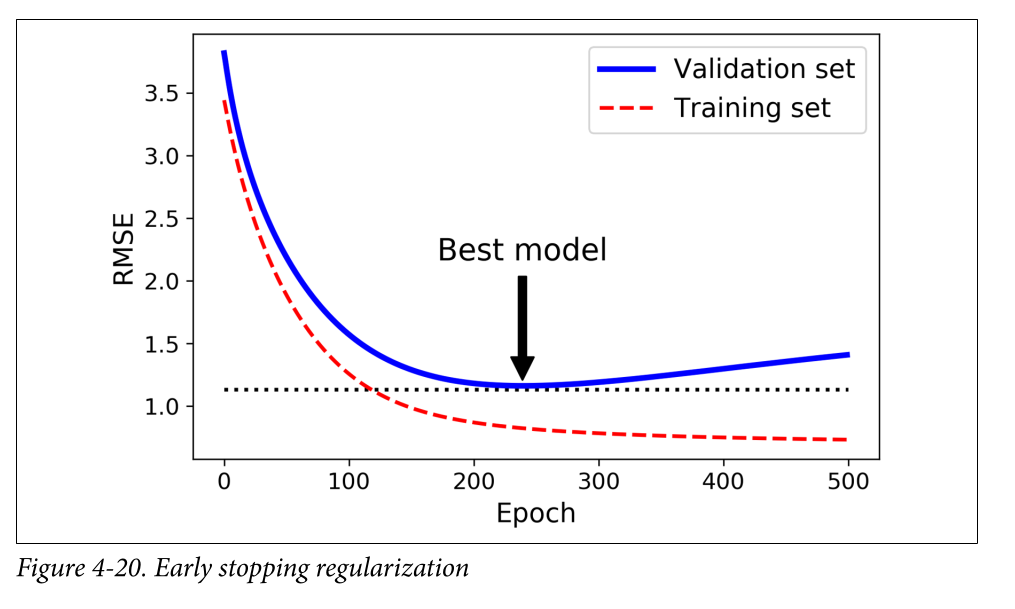

Sometimes it isn't easy to tell if the model has reached a minimum since the error curve isn't usually as smooth as it is in the figure above. 

You can let the model train for a few epochs after it starts to do worse, and then terminate the training and roll back to the best previous model when you are confident that the model will not do any better.

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter = 1, tol = None, warm_start = True,
                       penalty = None, learning_rate = 'constant',
                       eta0 = 0.0005)

minimum_val_error = float('inf')
train_errors, val_errors = [], []
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    val_error = mean_squared_error(y_test, y_val_predict)
    train_error = mean_squared_error(y_train, y_train_predict)
    train_errors.append(train_error)
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


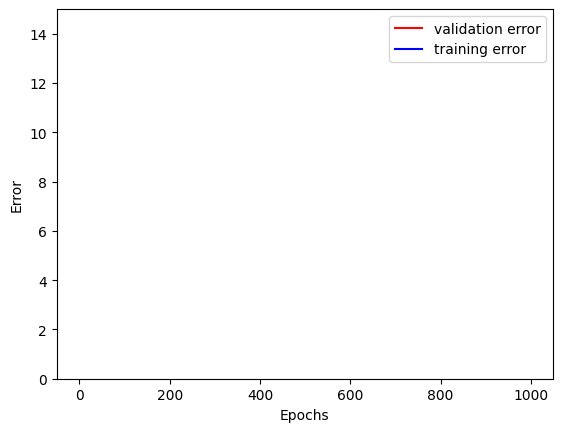

In [139]:
plt.plot(val_errors, 'r-', label = 'validation error')
plt.plot(train_errors,'b-', label = 'training error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc = 'best')
plt.ylim((0, 15))
plt.show()


# Logistic Regression
It is a binary classification algorithm that outputs 1 if the probability of the input belonging to the positive class is greater than 50%. Otherwise, it outputs 0.


The logistic regression works by calculating a weighted sum of the input features plus a bias term. This result is then fed into an activation function (the sigmoid activation function specifically) to get the final result.

$\hat{p} = h_\theta(x) = \sigma(X^T\theta)$

* $\sigma(.)$ is the sigmoid activation function.
* $\hat{p}$ is the probability of the input belonging to the positive class.

The sigmoid function is:
$\frac{1}{1+exp(-t)}$
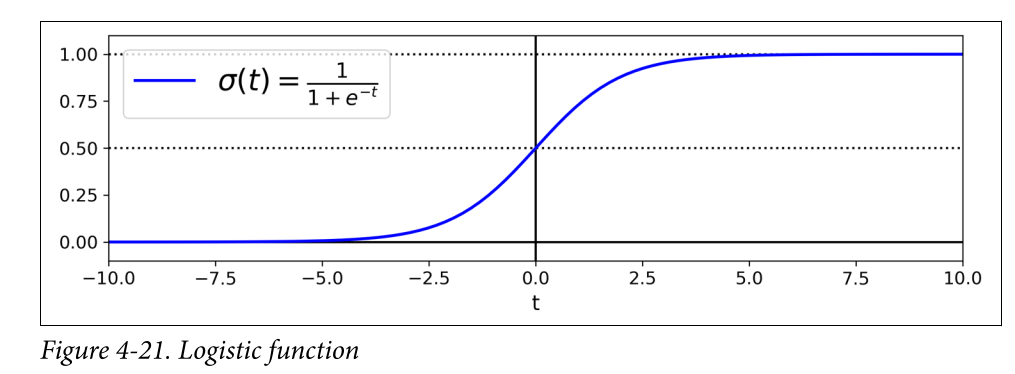

The final prediction is made depending on the value of $\hat{p}$ as follows:

$\hat{y}\ =\ 0\ if\ \hat{p} < 0.5$

$\hat{y}\ =\ 1\ if\ \hat{p} > 0.5$

The cost function of the logistic regression is:

$c(\theta) = -log(\hat{p})\ if\ y\ =\ 1$

$c(\theta) = -log(1-\hat{p})\ if\ y\ =\ 0$

The cost function over the entire dataset can be written as follows:

$J(\theta) = -\frac{1}{m} \sum_{i = 1}^{m} [y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$

The derivative of the cost function with respect to the $j^{th}$ model parameter is:

$\frac{\delta}{\delta \theta_{j}}J(\theta) = \frac{1}{m} \sum_{i = 1}^{m}(\sigma(\theta^Tx^{(i)}) - y^{(i)})x_{j}^{(i)}$

In [140]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:, 3:] #choose only the petal width as the input feature
y = (iris['target'] == 2).astype(int) #1 if iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

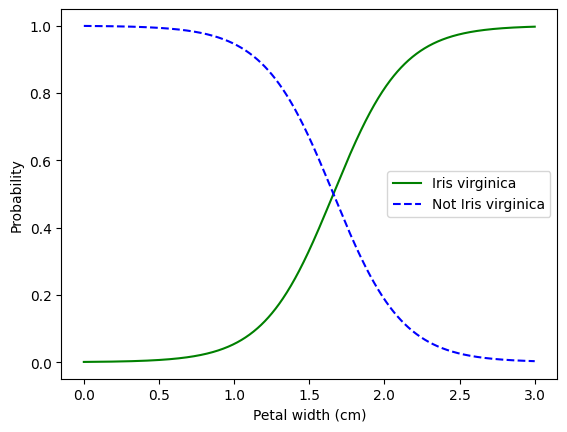

In [141]:
#plot the decision boundary for the model
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #create the x-axis
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc = 'best')
plt.show()

The point at which the two curves cross is the decision boundary point. Any flower with a petal width greater than about 1.6cm is classified as iris virginica, and any flower with petal width less than 1.6cm is another flower.

## Softmax Regression
Logistic regression can be extended to support multiple classes directly, without the need to train multiple binary classifiers. 

This can be done calculating a score for each class, and finding the final probability of the input being that class by feeding the score into the softmax function. 

$s_k(x) = x^T\theta^{(k)}$

$s_k(x)$ = score function.

Each class has its own parameter vector $\theta^{(k)}$ (multiple neurons, each with its own set of weights). The parameters of the full model are stored in a matrix, where each row represents the parameters of a single class.

The softmax function is:

$\hat{p_k} = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j = 1}^{K}exp(s_j(x))}$

* $K$ is the number of classes
* $s(x)$ is the score vector
* $\sigma(s(x))_k$ is the estimated probability for each class

The final output of the softmax regressor is:

$\hat{y} = argmax(\sigma{(s(x))})_k$

The cost function is:

$J(\Theta) = -\frac{1}{m} \sum_{i = 1}^{m}\sum_{k = 1}^{K} y_k^{(i)}log(\hat{p_k}^{(i)})$

This cost function is known as the cross entropy cost function. More information can be found in this video:
https://www.youtube.com/watch?v=ErfnhcEV1O8

The gradient of the cost function with respect to the parameters can be expressed as the following:

$\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i = 1}^{m}(\hat{p}_k^{(i)} - y_k^{(i)}) x ^{(i)}$

__Note:__ Instead of using alpha as the regularization hyperparameter, we use its inverse C. The higher the value of C, the less regularization there is.

In [144]:
X = iris['data'][:, (2, 3)] #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression( solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y.ravel())

LogisticRegression(C=10)